In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
data = pd.read_csv('German data.csv')
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [122]:
data.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [124]:
data.shape

(1000, 21)

In [125]:
data.isnull().any()

Creditability                        False
Account Balance                      False
Duration of Credit (month)           False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

Data Visualization

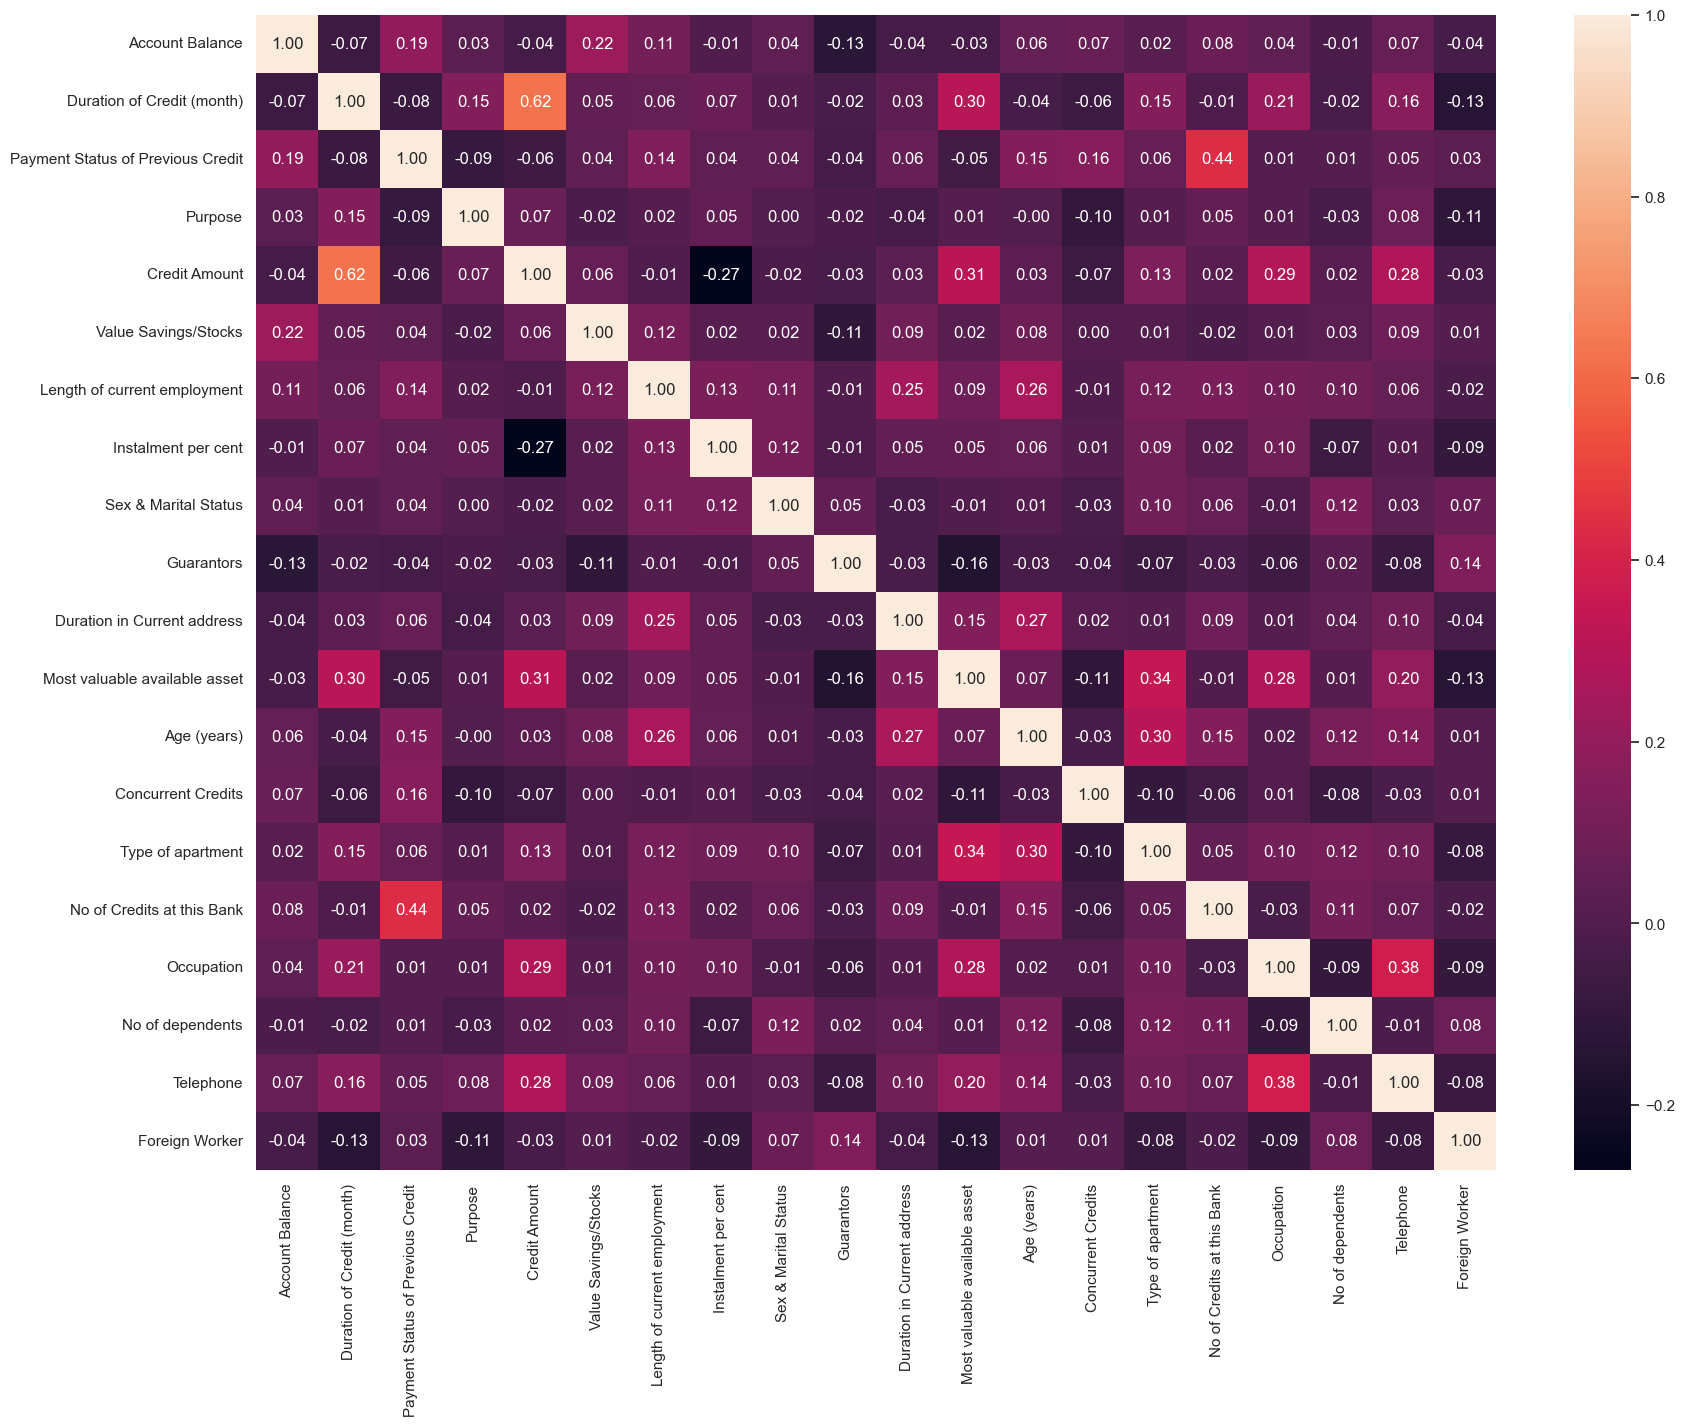

In [126]:
param_list = data.columns
plt.figure(figsize=(20, 15)) 
sns.heatmap(data[param_list[1:]].corr(), annot=True, fmt=".2f")
plt.show() 

In [127]:
data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


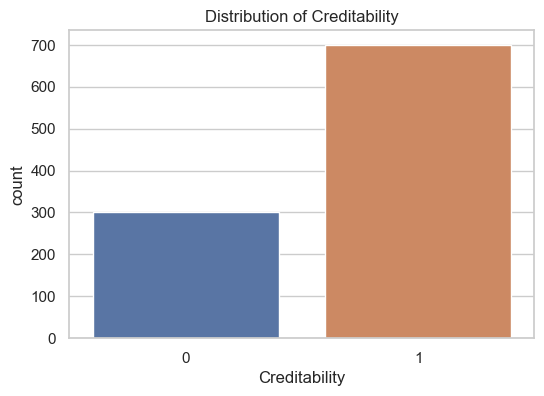

In [128]:
sns.set(style="whitegrid")

# Visualize the distribution of the target variable "Creditability"
plt.figure(figsize=(6, 4))
sns.countplot(x='Creditability', data=data)
plt.title('Distribution of Creditability')
plt.show()

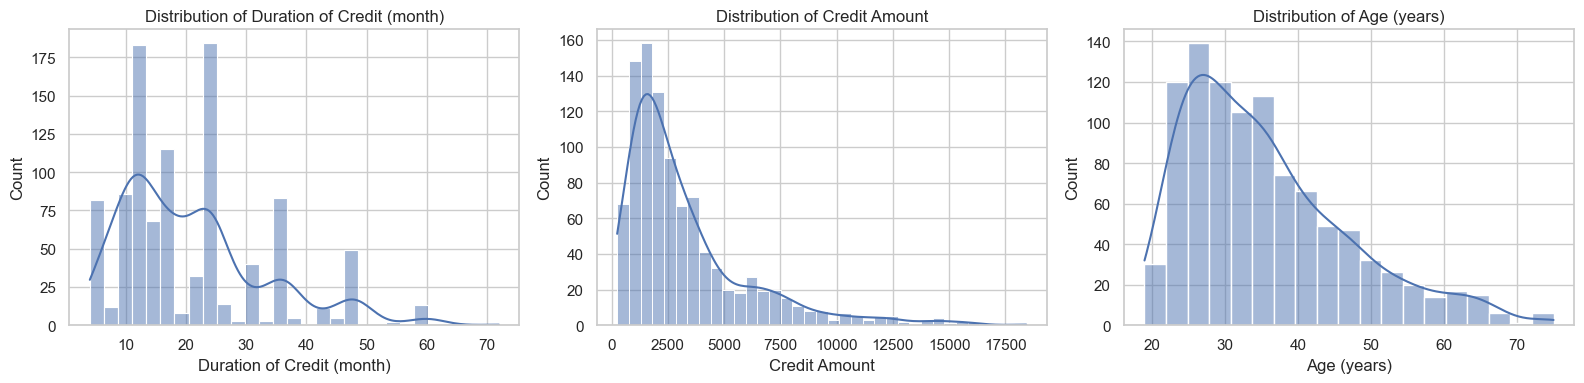

In [129]:
numerical_features = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']
plt.figure(figsize=(16, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

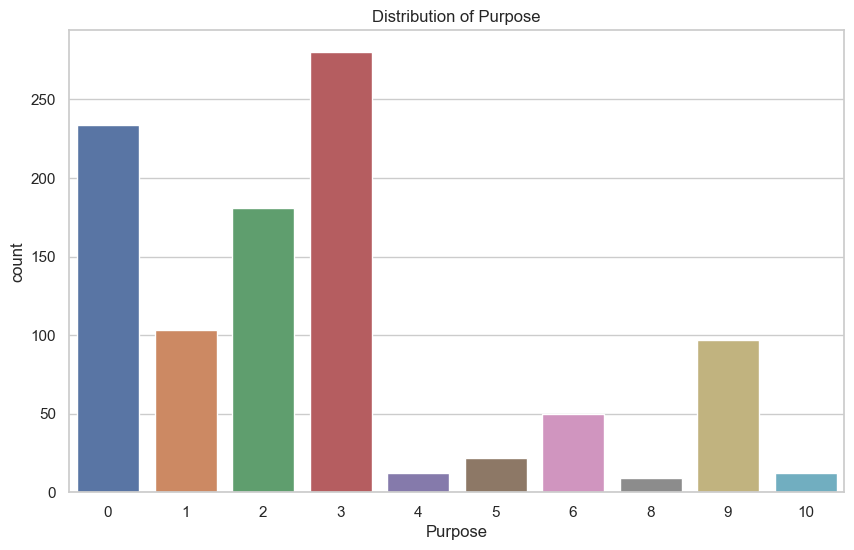

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=data)
plt.title('Distribution of Purpose')
plt.show()

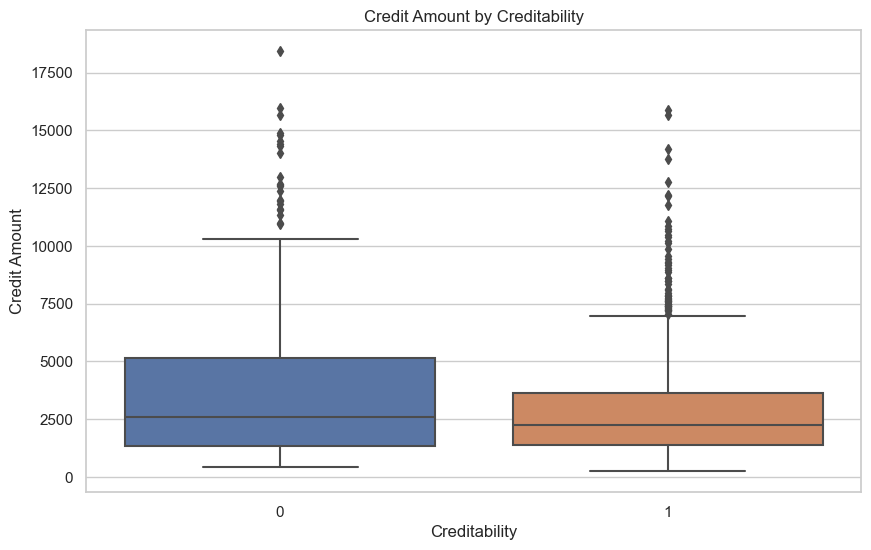

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Creditability', y='Credit Amount', data=data)
plt.title('Credit Amount by Creditability')
plt.show()

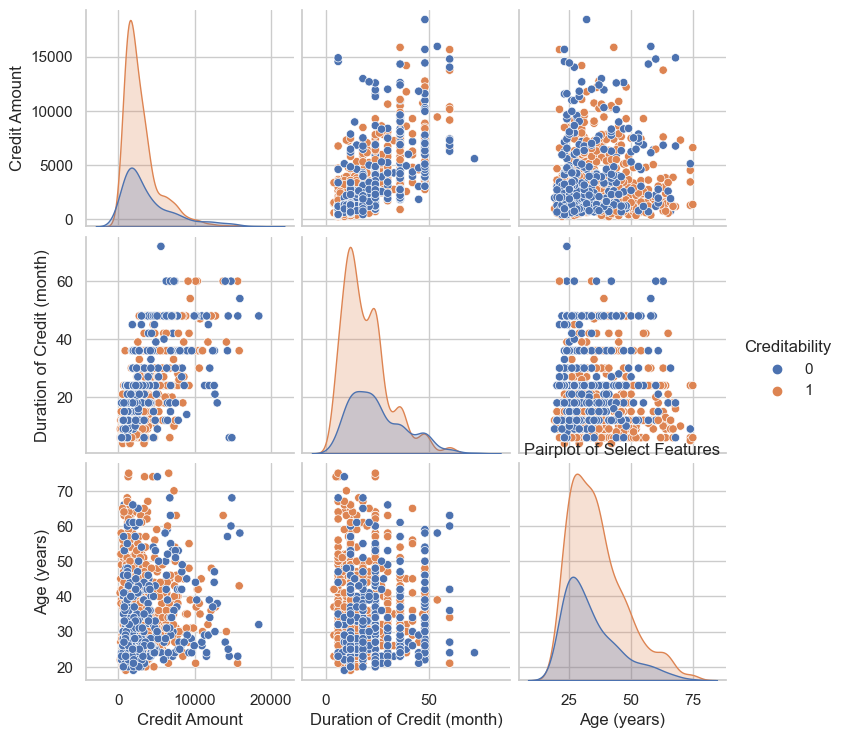

In [132]:
sns.pairplot(data[['Credit Amount', 'Duration of Credit (month)', 'Age (years)', 'Creditability']], hue='Creditability')
plt.title('Pairplot of Select Features')
plt.show()

Outlier removal

In [133]:
from scipy.stats import zscore
z_scores = zscore(data[['Credit Amount', 'Duration of Credit (month)', 'Age (years)']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
data = data[~outliers]

# Print the number of removed outliers
print(f'Number of outliers removed: {sum(outliers)}')

Number of outliers removed: 42


In [134]:
data.shape

(958, 21)

Splitting the data into X and y(target)

In [4]:
X = data.iloc[:,1:]
X

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [5]:
y = data.iloc[:,0:1]
y

,Creditability
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)              
f_Scores.columns = ['Specs','Score'] 
print(f_Scores.nlargest(10,'Score'))  
f_Scores 

                                Specs         Score
4                       Credit Amount  58264.415475
1          Duration of Credit (month)    321.030795
0                     Account Balance     75.474269
5                Value Savings/Stocks     37.937451
12                        Age (years)     30.178268
2   Payment Status of Previous Credit     24.103752
11      Most valuable available asset      9.503534
6        Length of current employment      5.799899
13                 Concurrent Credits      2.243436
7                 Instalment per cent      2.204619


,Specs,Score
0,Account Balance,75.474269
1,Duration of Credit (month),321.030795
2,Payment Status of Previous Credit,24.103752
3,Purpose,0.860039
4,Credit Amount,58264.415475
5,Value Savings/Stocks,37.937451
6,Length of current employment,5.799899
7,Instalment per cent,2.204619
8,Sex & Marital Status,1.452292
9,Guarantors,0.125806


Splitting the dataset in train and test set

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [138]:
X_train.shape

(718, 20)

In [139]:
X_test.shape

(240, 20)

Standardizing the dataset using standard scalar

In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
X_train

array([[ 1.1298805 , -1.03415301, -0.50831331, ..., -0.4299052 ,
        -0.7925389 , -0.18993429],
       [ 0.33375273,  2.07460383,  1.35853556, ..., -0.4299052 ,
        -0.7925389 , -0.18993429],
       [-1.25850281, -0.75153875,  1.35853556, ..., -0.4299052 ,
         1.26176771, -0.18993429],
       ...,
       [-0.46237504, -0.75153875, -0.50831331, ..., -0.4299052 ,
         1.26176771, -0.18993429],
       [ 1.1298805 , -0.75153875,  1.35853556, ..., -0.4299052 ,
        -0.7925389 , -0.18993429],
       [-0.46237504,  0.37891828,  0.42511113, ..., -0.4299052 ,
         1.26176771, -0.18993429]])

Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

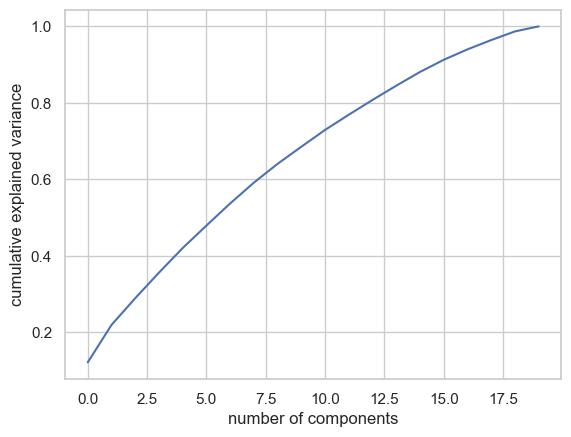

In [142]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [143]:
pca = PCA(n_components=16)
pca.fit(X_train)
data = pca.transform(X_train)

In [144]:
data = pd.DataFrame(data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-2.308953,-0.334605,-1.722447,-1.280042,-0.273252,0.071491,0.163417,0.316128,0.191506,0.460880,-0.160465,0.400304,-0.766560,0.008514,-0.628124,-0.973743
1,3.025129,1.165209,1.188126,-0.011689,-0.668905,0.850169,-0.871899,-0.588903,-2.135695,-1.436996,-0.349168,0.665778,0.068335,-0.161416,-0.449507,-1.393901
2,0.116990,3.897588,-0.316320,0.386189,1.691650,0.331568,-2.693661,0.702837,1.182800,-0.153478,0.734765,-1.239077,-0.787017,-1.179979,-0.726612,1.510265
3,-0.008529,-2.419951,2.033938,-1.675091,0.771249,-0.463000,0.458520,1.124215,2.056783,0.302114,-0.316538,-0.118271,0.870178,-0.770949,-1.451708,0.976331
4,-0.140334,2.146798,0.478117,0.305534,0.195971,2.504418,-0.808936,0.162089,0.487866,0.131349,-0.317821,-0.160857,-0.622313,-1.119316,0.770580,1.026575


LOGISTIC REGRESSION 

In [145]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
LR_pred_train = LR.predict(X_train)

In [146]:
LRtest = accuracy_score(y_test,LR_pred)
LRtrain =  accuracy_score(y_train,LR_pred_train)
print('Testing Accuracy = ', accuracy_score(y_test,LR_pred))
print('Training Accuracy = ', accuracy_score(y_train,LR_pred_train))

Testing Accuracy =  0.7708333333333334
Training Accuracy =  0.786908077994429


In [147]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        64
           1       0.83      0.86      0.85       176

    accuracy                           0.77       240
   macro avg       0.70      0.69      0.70       240
weighted avg       0.76      0.77      0.77       240



LINEAR SVM

In [148]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='linear')
SVC_classifier.fit(X_train,y_train)
SVC_y_pred = SVC_classifier.predict(X_test)
SVC_y_predict_train = SVC_classifier.predict(X_train)

In [149]:
LinearSVMtest = accuracy_score(y_test,SVC_y_pred)
LinearSVMtrain = accuracy_score(y_train,SVC_y_predict_train)
print('Testing Accuracy = ', LinearSVMtest)
print('Training Accuracy = ', LinearSVMtrain)

Testing Accuracy =  0.7666666666666667
Training Accuracy =  0.7910863509749304


In [150]:
print(classification_report(y_test,SVC_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.45      0.51        64
           1       0.82      0.88      0.85       176

    accuracy                           0.77       240
   macro avg       0.70      0.67      0.68       240
weighted avg       0.75      0.77      0.76       240



NON LINEAR SVM

In [151]:
NSVC_classifier = SVC(kernel='rbf')
NSVC_classifier.fit(X_train,y_train)
NSVC_y_pred = NSVC_classifier.predict(X_test)
NSVC_y_predict_train = NSVC_classifier.predict(X_train)

In [152]:
NonLinearSVMtest = accuracy_score(y_test,NSVC_y_pred)
NonLinearSVMtrain = accuracy_score(y_train,NSVC_y_predict_train)
print('Testing Accuracy = ', NonLinearSVMtest)
print('Training Accuracy = ', NonLinearSVMtrain)

Testing Accuracy =  0.75
Training Accuracy =  0.8774373259052924


In [153]:
print(classification_report(y_test,NSVC_y_pred))

              precision    recall  f1-score   support

           0       0.55      0.38      0.44        64
           1       0.80      0.89      0.84       176

    accuracy                           0.75       240
   macro avg       0.67      0.63      0.64       240
weighted avg       0.73      0.75      0.73       240



Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
Naivey_pred = model.predict(X_test)
Naivey_pred_train = model.predict(X_train)

In [155]:
Naivetest = accuracy_score(y_test,Naivey_pred)
Naivetrain = accuracy_score(y_train,Naivey_pred_train)
print('Testing Accuracy = ', Naivetest)
print('Training Accuracy = ', Naivetrain)

Testing Accuracy =  0.7125
Training Accuracy =  0.745125348189415


In [156]:
print(classification_report(y_test,Naivey_pred))

              precision    recall  f1-score   support

           0       0.47      0.66      0.55        64
           1       0.85      0.73      0.79       176

    accuracy                           0.71       240
   macro avg       0.66      0.69      0.67       240
weighted avg       0.75      0.71      0.72       240



MLP CLASSIFIER

In [157]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(50, 10), 
    activation='relu',             
    solver='adam',               
    max_iter=100,               
    random_state=42               
)

mlp_classifier.fit(X_train, y_train)
MLP_y_pred = mlp_classifier.predict(X_test)
MLP_y_predict_train = mlp_classifier.predict(X_train)

In [158]:
MLPtest = accuracy_score(y_test,MLP_y_pred)
MLPtrain = accuracy_score(y_train,MLP_y_predict_train)
print('Testing Accuracy = ', MLPtest)
print('Training Accuracy = ', MLPtrain)

Testing Accuracy =  0.7416666666666667
Training Accuracy =  0.8871866295264624


In [159]:
print(classification_report(y_test,MLP_y_pred))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        64
           1       0.83      0.81      0.82       176

    accuracy                           0.74       240
   macro avg       0.67      0.68      0.68       240
weighted avg       0.75      0.74      0.74       240



DECISION TREE CLASSIFIER

In [160]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,splitter='best',criterion='gini')
DTC.fit(X_train,y_train)
d_y_predict = DTC.predict(X_test)
d_y_predict_train = DTC.predict(X_train)

In [161]:
DTCtest = accuracy_score(y_test,d_y_predict)
DTCtrain = accuracy_score(y_train,d_y_predict_train)
print('Testing Accuracy = ', DTCtest)
print('Training Accuracy = ', DTCtrain)

Testing Accuracy =  0.6916666666666667
Training Accuracy =  0.7367688022284122


In [162]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           0       0.32      0.14      0.20        64
           1       0.74      0.89      0.81       176

    accuracy                           0.69       240
   macro avg       0.53      0.52      0.50       240
weighted avg       0.63      0.69      0.65       240



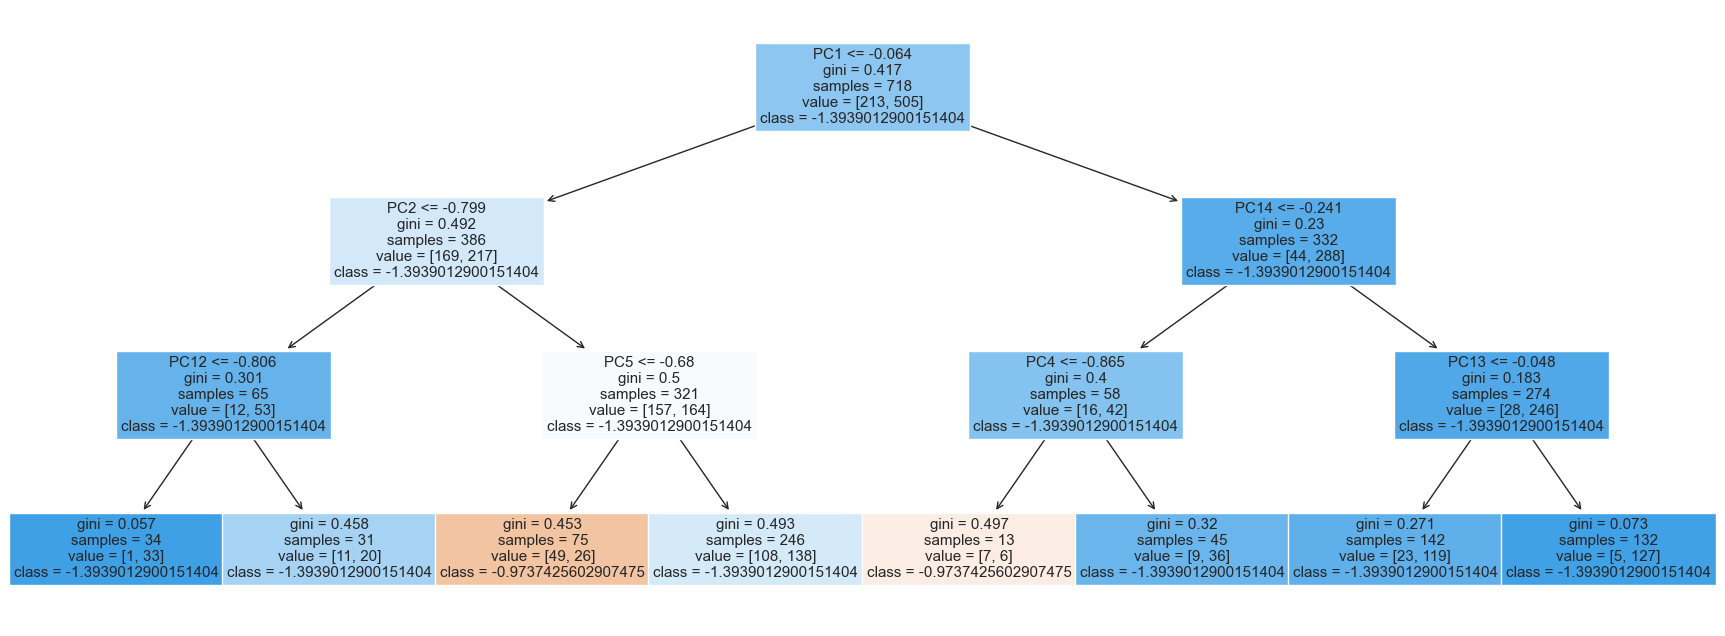

In [163]:
from sklearn.tree import plot_tree
feature_names = list(data.columns[:-1]) 
class_names = [str(class_name) for class_name in data[data.columns[-1]].unique()]
plt.figure(figsize=(22, 8))
plot_tree(DTC, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

RANDOM FOREST

In [164]:
from sklearn.ensemble import RandomForestClassifier
Randomforest =RandomForestClassifier(criterion= 'gini', max_depth = 3)
Randomforest.fit(X_train,y_train)
r_y_predict = Randomforest.predict(X_test)
r_y_predict_train = Randomforest.predict(X_train)

In [165]:
RandomForesttest = accuracy_score(y_test,r_y_predict)
RandomForesttrain = accuracy_score(y_train,r_y_predict_train)
print('Testing Accuracy = ', RandomForesttest)
print('Training Accuracy = ', RandomForesttrain)

Testing Accuracy =  0.75
Training Accuracy =  0.7256267409470752


In [166]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        64
           1       0.75      1.00      0.85       176

    accuracy                           0.75       240
   macro avg       0.87      0.53      0.49       240
weighted avg       0.81      0.75      0.66       240



ADABOOST CLASSIFIER

In [167]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1)
AdaBoost = abc.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
y_pred_train = AdaBoost.predict(X_train)

In [168]:
Adaboosttest = accuracy_score(y_test,y_pred)
Adaboosttrain =  accuracy_score(y_train,y_pred_train)
print('Testing Accuracy = ', Adaboosttest)
print('Training Accuracy = ', Adaboosttrain)

Testing Accuracy =  0.7833333333333333
Training Accuracy =  0.7701949860724234


In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        64
           1       0.84      0.88      0.86       176

    accuracy                           0.78       240
   macro avg       0.72      0.70      0.71       240
weighted avg       0.78      0.78      0.78       240



In [170]:
from tabulate import tabulate
result = [
    ["Logistic Regression", LRtest, LRtrain],
    ["Linear SVM", LinearSVMtest, LinearSVMtrain],
    ["Non-Linear SVM", NonLinearSVMtest, NonLinearSVMtrain],
    ["MLP", MLPtest, MLPtrain],
    ["Decision Tree", DTCtest, DTCtrain],
    ["Random Forest", RandomForesttest, RandomForesttrain],
    ["Adaboost", Adaboosttest, Adaboosttrain],
    ["Naive Bayes", Naivetest, Naivetrain],
]

# Create the table
table = tabulate(result, headers=["Classifier", "Test Accuracy", "Train Accuracy"], tablefmt="pretty")

# Print the table
print(table)

+---------------------+--------------------+--------------------+
|     Classifier      |   Test Accuracy    |   Train Accuracy   |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.7708333333333334 | 0.786908077994429  |
|     Linear SVM      | 0.7666666666666667 | 0.7910863509749304 |
|   Non-Linear SVM    |        0.75        | 0.8774373259052924 |
|         MLP         | 0.7416666666666667 | 0.8871866295264624 |
|    Decision Tree    | 0.6916666666666667 | 0.7367688022284122 |
|    Random Forest    |        0.75        | 0.7256267409470752 |
|      Adaboost       | 0.7833333333333333 | 0.7701949860724234 |
|     Naive Bayes     |       0.7125       | 0.745125348189415  |
+---------------------+--------------------+--------------------+


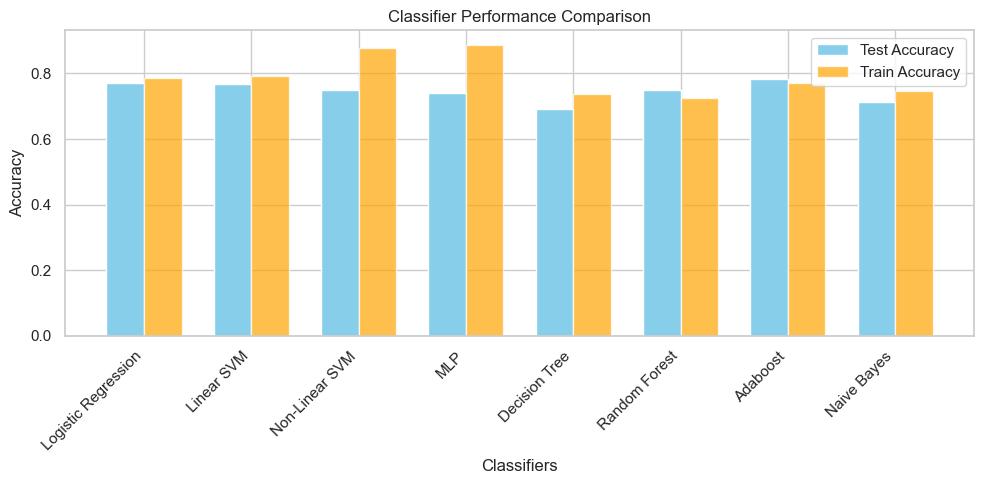

In [171]:
classifiers = ["Logistic Regression", "Linear SVM", "Non-Linear SVM", "MLP", "Decision Tree", "Random Forest", "Adaboost", "Naive Bayes"]
test_accuracies = [LRtest, LinearSVMtest, NonLinearSVMtest, MLPtest, DTCtest, RandomForesttest, Adaboosttest, Naivetest]
train_accuracies = [LRtrain, LinearSVMtrain, NonLinearSVMtrain, MLPtrain, DTCtrain, RandomForesttrain, Adaboosttrain, Naivetrain]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 5))

plt.bar(index, test_accuracies, bar_width, color='skyblue', label='Test Accuracy')
plt.bar(index + bar_width, train_accuracies, bar_width, color='orange', label='Train Accuracy', alpha=0.7)

plt.title('Classifier Performance Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(index + bar_width / 2, classifiers, rotation=45, ha='right')
plt.tight_layout()

plt.show()
